In [1]:
'''Decision Tree Classifier
Aim: To detect and classify Iris flowers '''
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris(as_frame=True)
iris.data.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
25,5.0,3.0,1.6,0.2


In [120]:
x = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target.values

(0, 0)

In [86]:
dtree_clf = DecisionTreeClassifier(
    max_depth=3
)
dtree_clf.fit(x,y)

DecisionTreeClassifier(max_depth=3)

In [87]:
from sklearn.tree import export_graphviz
export_graphviz(dtree_clf,'./DTree',
feature_names=["petal length (cm)", "petal width (cm)"],
class_names=iris.target_names,rounded=True,filled=True)

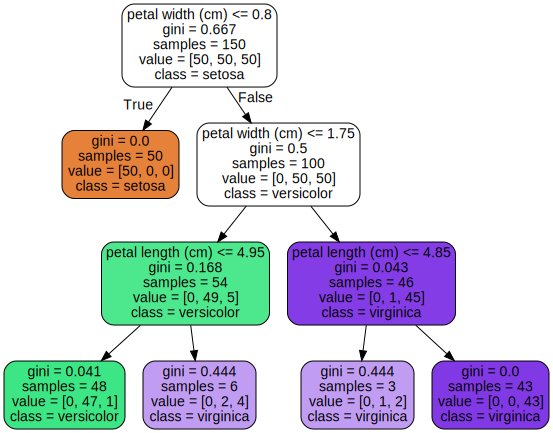

In [88]:
from graphviz import Source
Source.from_file('./DTree')

In [89]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [90]:
# Example:
dtree_clf.predict([[3,1.8]])
# Thus it predicts 'virginica'

array([2])

In [91]:
iris.data['petal length (cm)'].max(),iris.data['petal width (cm)'].max()

(6.9, 2.5)

In [133]:
dtree_clf.tree_.threshold.shape,dtree_clf.tree_.threshold

((9,),
 array([ 0.80000001, -2.        ,  1.75      ,  4.95000005, -2.        ,
        -2.        ,  4.85000014, -2.        , -2.        ]))

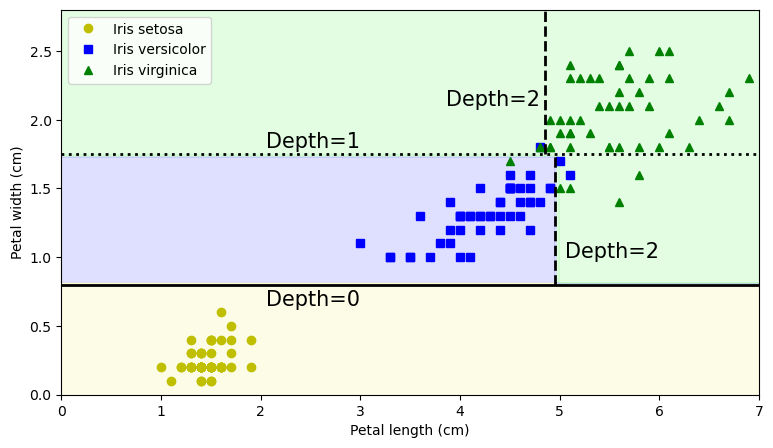

In [164]:
# Let's show the plot of predictions:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(9, 5))
xl=7;yl=2.8
p1,p2 = np.meshgrid(np.linspace(0,xl,100),np.linspace(0,yl,100))
x_topredict = np.c_[p1.ravel(),p2.ravel()]
y_predicted = dtree_clf.predict(x_topredict).reshape(p1.shape)
thd0, thd1, thd2, thd3 = dtree_clf.tree_.threshold[[0,2,3,6]]
x2 = x.reshape(-1,2)
plt.contourf(p1,p2,y_predicted,alpha=0.3,cmap=custom_cmap)
for idx, (name,style) in enumerate (zip(iris.target_names,("yo", "bs", "g^"))):
    plt.plot(x2[:, 0][y==idx],x2[:,1][y==idx],style,label=f"Iris {name}")
plt.plot([0,xl],[thd0,thd0],"k-", linewidth=2)
plt.plot([0,xl],[thd1,thd1],"k:", linewidth=2)
plt.plot([thd2,thd2],[thd0,thd1],"k--", linewidth=2)
plt.plot([thd3,thd3],[thd1,yl],"k--", linewidth=2)
plt.text(3, 0.65, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3, 1.8, "Depth=1", horizontalalignment="right", fontsize=15)
plt.text(6, 1, "Depth=2", horizontalalignment="right", fontsize=15)
plt.text(4.8, 2.1, "Depth=2", horizontalalignment="right", fontsize=15)

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()
plt.show()

In [144]:
dtree_clf.tree_

In [154]:
thd0, thd1, thd2, thd3

(0.800000011920929, 1.75, 4.950000047683716, 4.8500001430511475)

In [167]:
# Probabilities:
dtree_clf.predict_proba([[5,1.9]])

array([[0., 0., 1.]])

In [168]:
dtree_clf.predict([[5,1.9]])

array([2])